# Practice Assignment: MNIST Digit classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
digit_mnist = keras.datasets.mnist

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

In [8]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [9]:
x_valid, x_train = x_train_n[:6000], x_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
x_test = x_test_n

print(x_valid.shape)
print(x_train.shape)
print(y_valid.shape)
print(y_train.shape)
print(x_test.shape)

(6000, 28, 28)
(54000, 28, 28)
(6000,)
(54000,)
(10000, 28, 28)


In [10]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [13]:
weights, biases = model.layers[1].get_weights()

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
model_history = model.fit(x_train, y_train, epochs=60, validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9293 - val_loss: 0.2254 - val_accuracy: 0.9385
Epoch 4/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 6/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1638 - val_accuracy: 0.9525
Epoch 7/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1483 - val_accuracy:

In [16]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

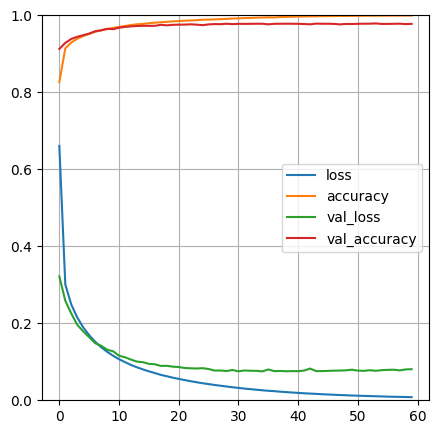

In [17]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9795


[0.07412999868392944, 0.9794999957084656]

In [21]:
x_new = x_test[0:5]

In [22]:
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

In [36]:
classes = ["zero", "one", "two",
         "three", "four", "five",
         "six", "seven", "eight", "nine"]
out = np.array(classes)[y_pred]
print(out)

['seven' 'two' 'one' 'zero' 'four']


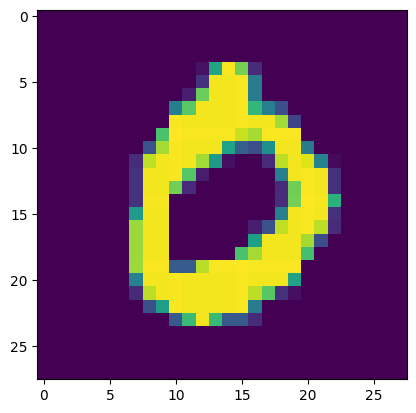

In [29]:
plt.imshow(x_test[3])